In [2]:
from sklearn.manifold import TSNE
import torch
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rc('font',family='Times New Roman')

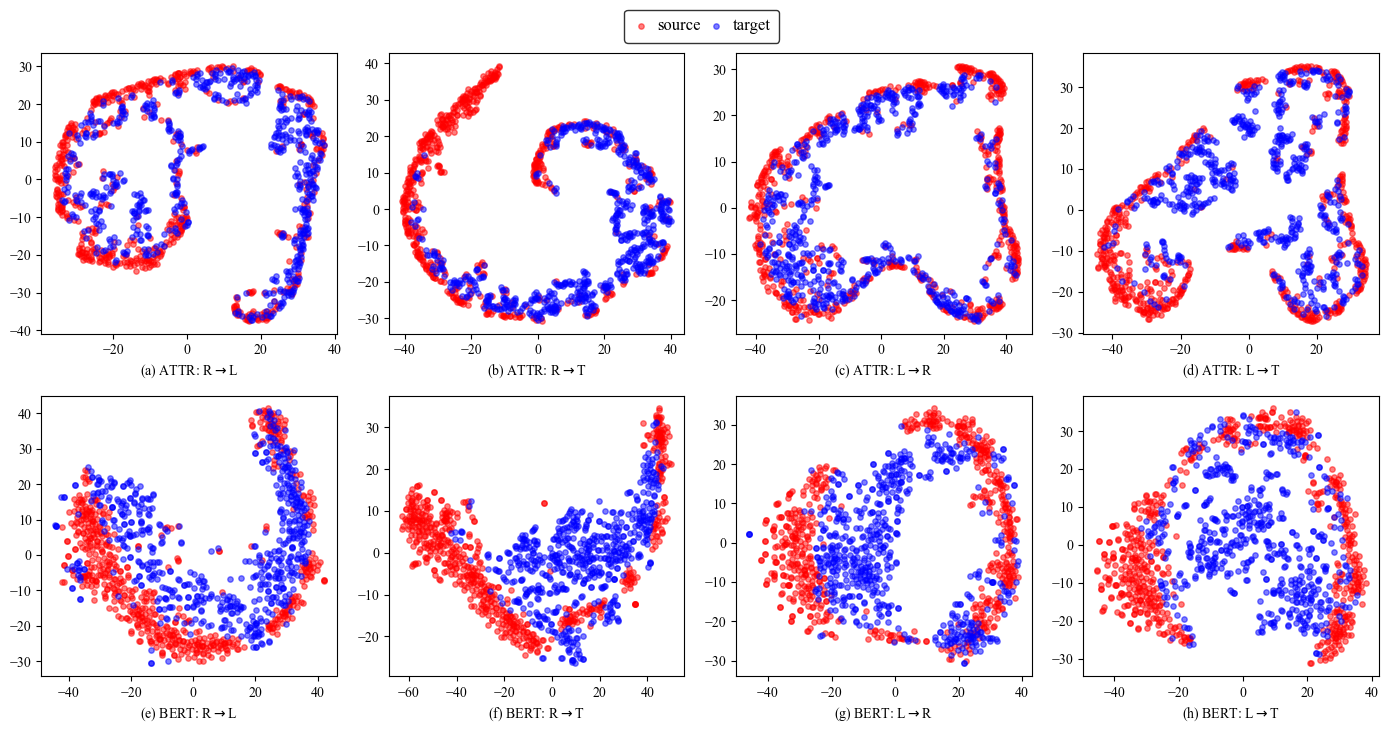

In [4]:
i = 1
n = 97
dir_name = "./processed/aspect_embeddings"
s2t = {"restaurant": ("laptop", "twitter"), "laptop": ("restaurant", "twitter")}
fig = plt.figure(figsize=(14, 7))
for s in s2t:
    for t in s2t[s]:
        with open(os.path.join(dir_name, f"aspects-{s}-{s}.pt"), "rb") as f:
            ha1, hc1, seq1 = torch.load(f, "cpu")
        with open(os.path.join(dir_name, f"aspects-{s}-{t}.pt"), "rb") as f:
            ha2, hc2, seq2 = torch.load(f, "cpu")
        tsne = TSNE(2, perplexity=30, random_state=33)
        plt.subplot(2, 4, i)
        output = tsne.fit_transform(np.array(random.sample(ha1, 600)+random.sample(ha2, 600)))
        l = len(output) // 2
        plt.scatter(output[:l,0], output[:l,1], c='r', s=15, alpha=0.5, edgecolors=None, label="source")
        plt.scatter(output[l:][:,0], output[l:,1], c='b', s=15, alpha=0.5, edgecolors=None, label="target")
        plt.xlabel(fr"({chr(n)}) ATTR: {s[0].upper()}$\rightarrow${t[0].upper()}")
        plt.subplot(2, 4, i+4)
        output = tsne.fit_transform(np.array(random.sample(seq1, 600)+random.sample(seq2, 600)))
        plt.scatter(output[:l,0], output[:l,1], c='r', s=15, alpha=0.5, edgecolors=None, label="source")
        plt.scatter(output[l:][:,0], output[l:,1], c='b', s=15, alpha=0.5, edgecolors=None, label="target")
        plt.xlabel(fr"({chr(n+4)}) BERT: {s[0].upper()}$\rightarrow${t[0].upper()}")
        i+=1
        n+=1
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(0.56, 1.04), ncol=2, edgecolor="black", fontsize="12",
    handlelength=1, labelspacing=0, columnspacing=0.4, handletextpad=0.5, borderaxespad=0.0, borderpad=0.5)
plt.tight_layout()
plt.savefig("feature_visualization.pdf", format="pdf", bbox_inches="tight")
plt.savefig("feature_visualization.svg", format="svg", bbox_inches="tight")
plt.show()